# K-Means Clustering


Proviamo con un esempio su un dataset reale

## Obiettivo:

Per prima cosa ci devono essere chiare la struttura dei dati e l'obiettivo da raggiungere nella creazione dei cluster.

In questo caso il dataset è descritto sotto e il nostro obiettivo è creare gruppi omogenei di clienti per scopi di marketing.
Come verranno creati e come interpretare i risultati dipende molto dalle richieste del reparto marketing e dalla nostra comprensione dei dati, quindi il primo step è EDA!

----

## The Data

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is public available for research. The details are described in [Moro et al., 2011].


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

## Leggiamo il file csv in "https://raw.githubusercontent.com/pg-88/IFOA_ML_AI/main/Risorse/dataset/bank-full.csv"

Quindi procediamo a vedere com'è strutturato il dataset sia da un punto di vista di tipi di dati, numero e tipo di feature sia da un punto di vista statistico

**N.B.** In questa fase siamo ancora a caccia di collegamenti interessanti per capire cosa potremmo aspettarci dai dati.

In questa fase è importante capire e interpretare bene i dati, se possibile conviene parlare con qualcuno che conosce bene il sistema altrimenti rischiamo di immaginare collegamenti che non hanno valore nel mondo reale.

Se non siamo esperti e non abbiamo un esperto sotto mano conviene approfondire **bene** la fase di EDA.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pg-88/IFOA_ML_AI/main/Risorse/dataset/bank-full.csv")

In [ ]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

### Analisi delle Feature Continue (numeriche)

Concentriamoci prima su quello che è già in formato numerico e proviamo a capire se c'è qualche logica interessante che spicca.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


#### Partiamo con qualche grafico

La prima cosa che mi viene in mente è di vedere come l'età dei clienti (possibili clienti) influisce sul sistema.

<Axes: xlabel='age', ylabel='Count'>

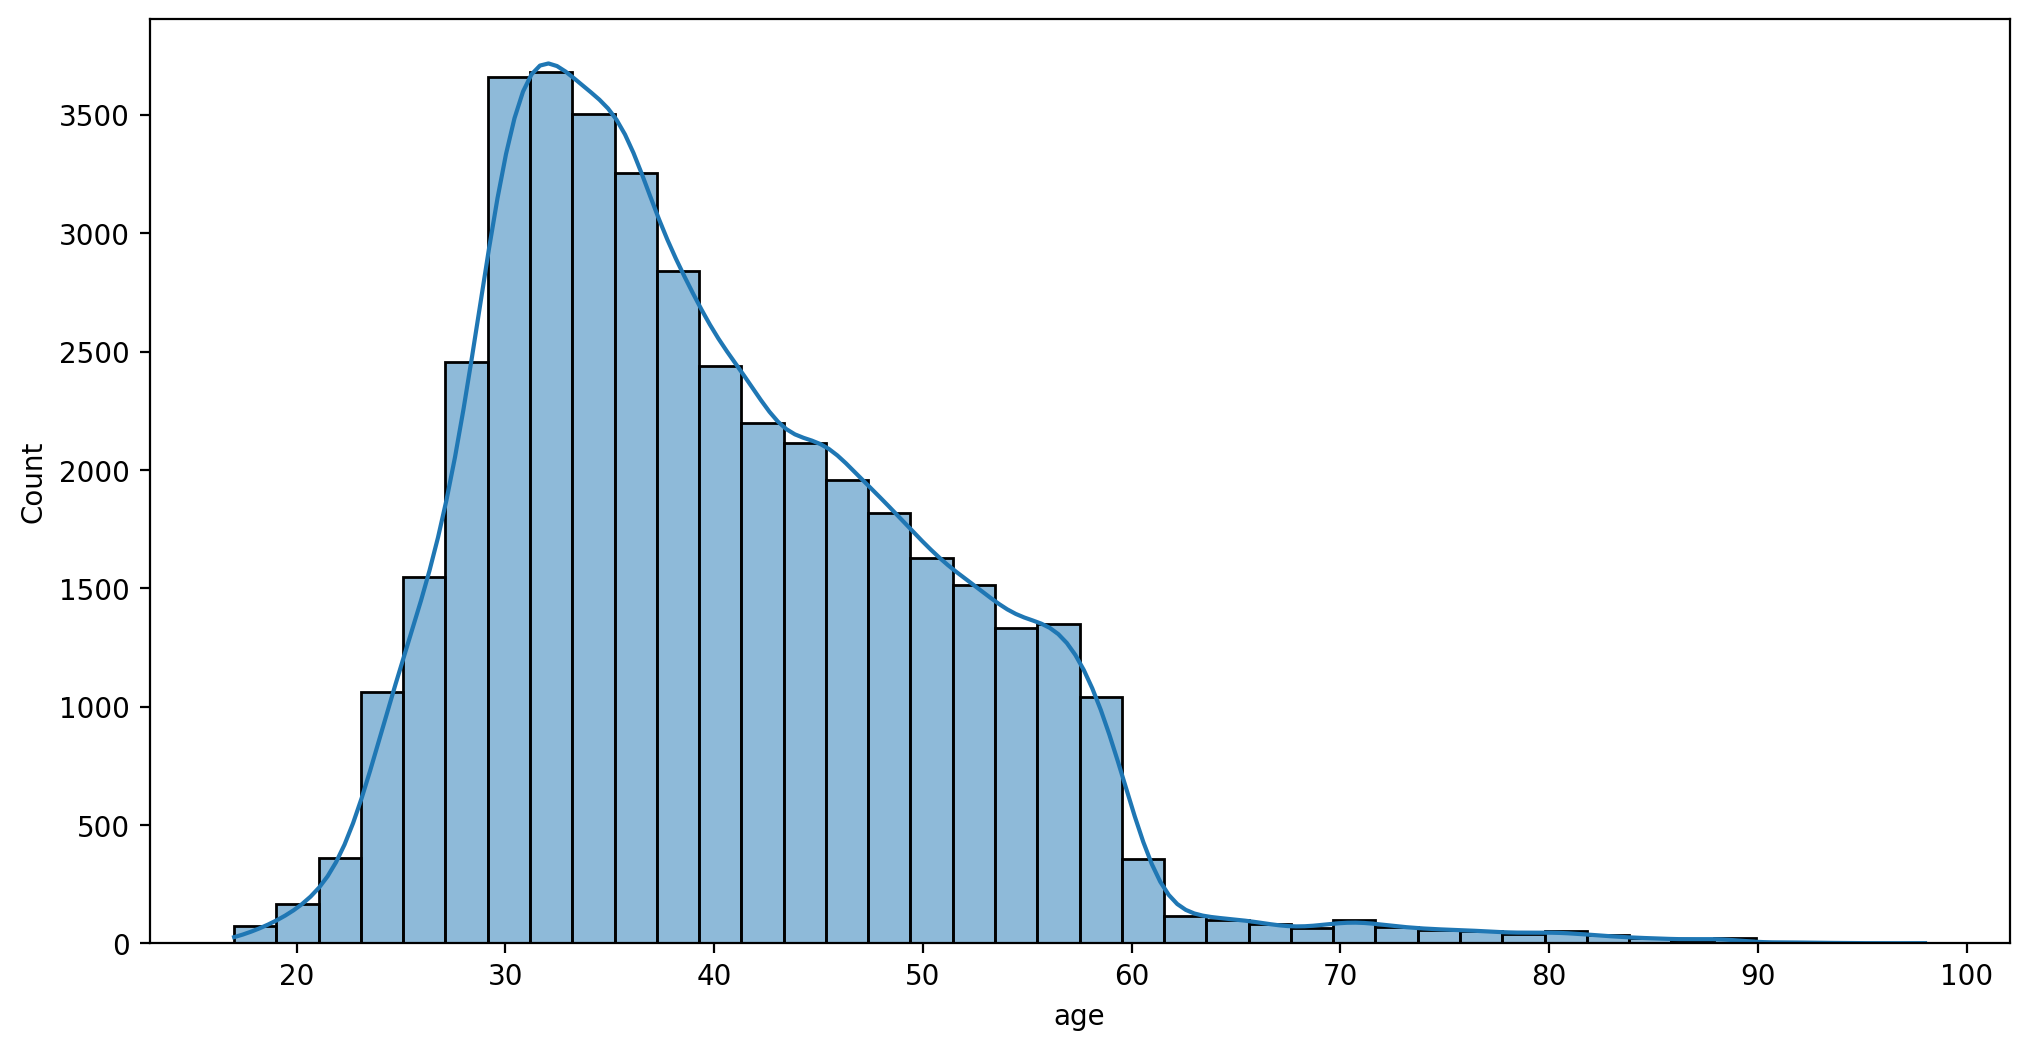

In [ ]:
## grafico delle frequenze delle varie età dei clienti
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x='age', bins=40, kde=True)

#### Età - Prestito Sì/No

Vista la distribuzione di età sartebbe interessante vedere quanti di questi clienti hanno un prestito e quanti invece no.


<Axes: xlabel='age', ylabel='Count'>

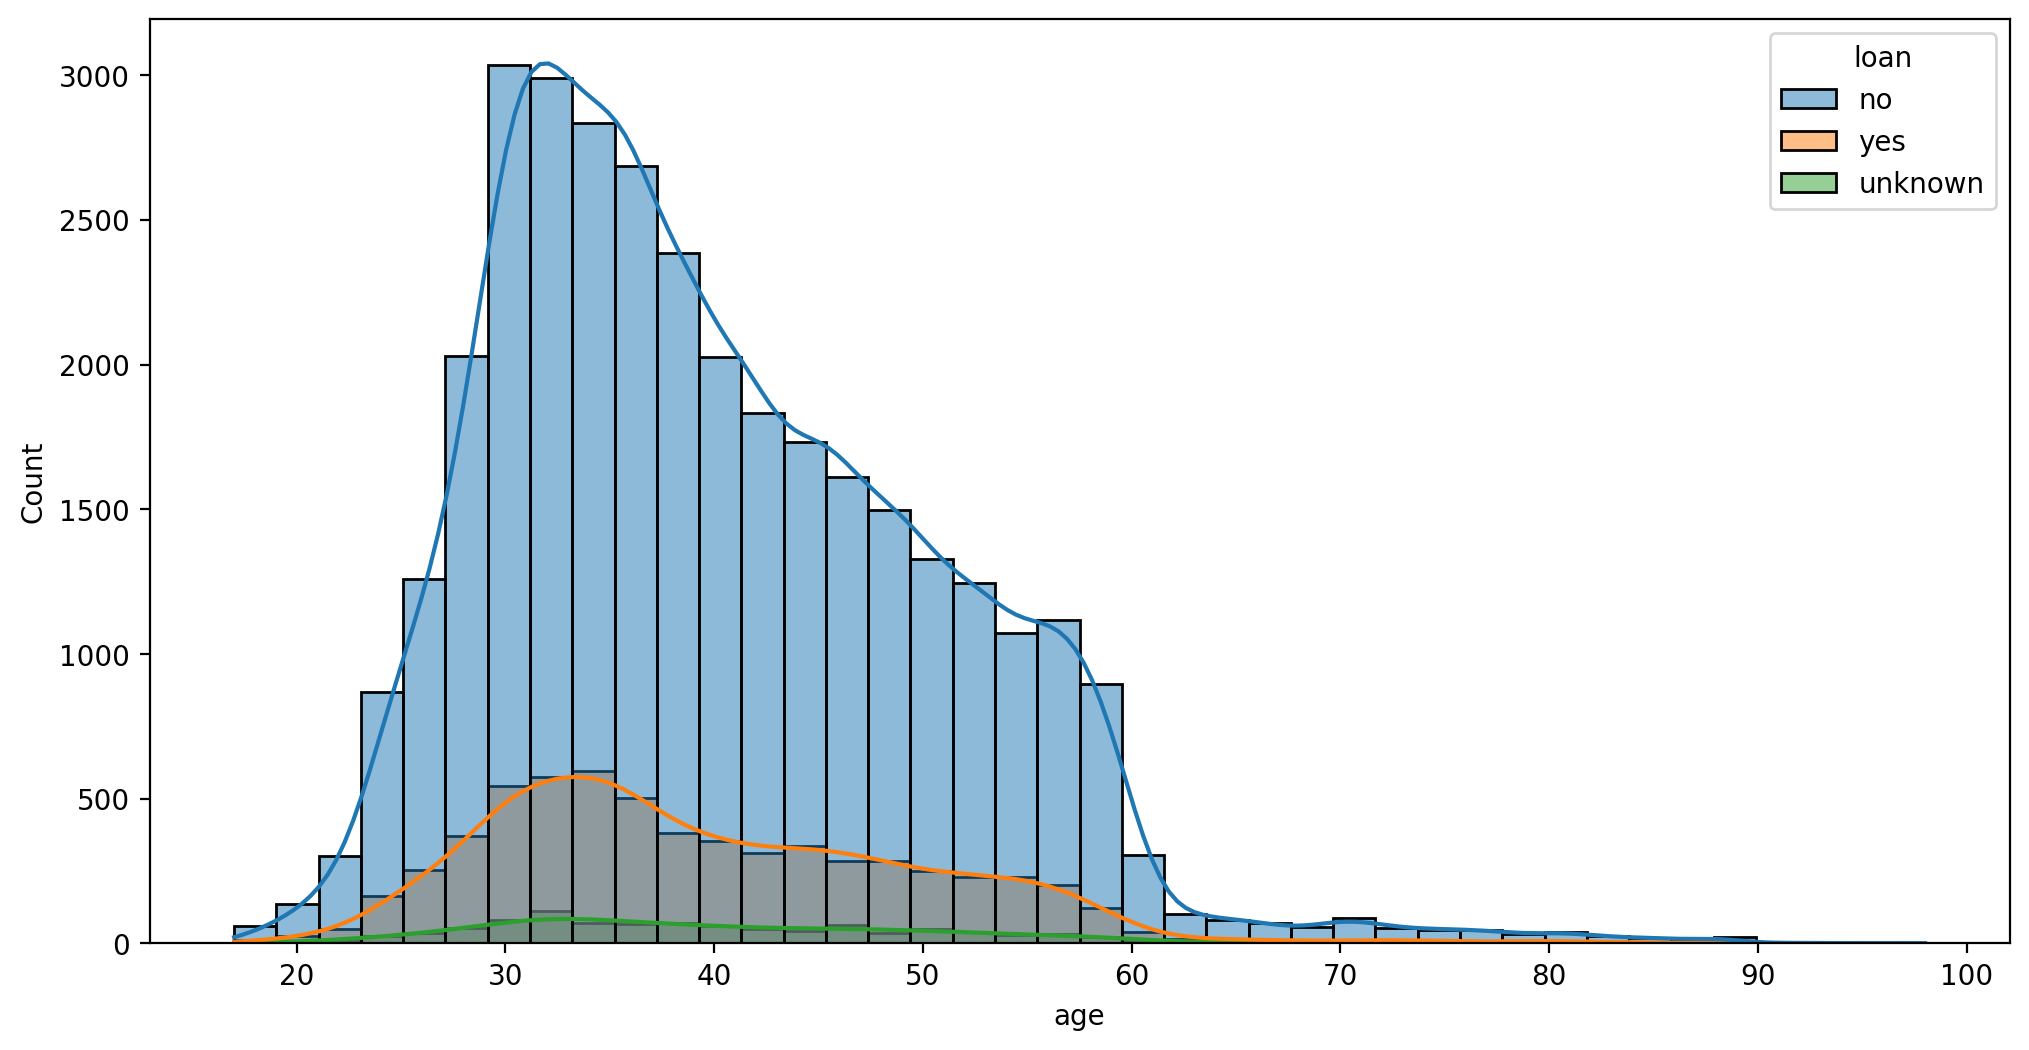

In [ ]:
## greafico istogrammi con indicazione di chi ha già un prestio
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x='age', bins=40, kde=True, hue='loan')

**Osservazione**:

Al marketing già questa informazione potrebbe essere utile ovvero raggruppare tutte le persone che non hanno un prestito e sono nella fascia di età giusta.

Mentre potrebbe essere interessante anche sapere chi ha già un prestito per una differente strategia di marketing

**PDAYS**

In numero di giorni trascorsi da quando il cliente è stato contattato è un altro parametro interessante, se devo decidere chi chiamare parto da quelli che non ho mai contattato o che ho contattato molto tempo fa.

*Attenzione* in questa feature si usa il numero 999 per indicare che un cliente non è mai stato contattato.

<Axes: xlabel='pdays', ylabel='Count'>

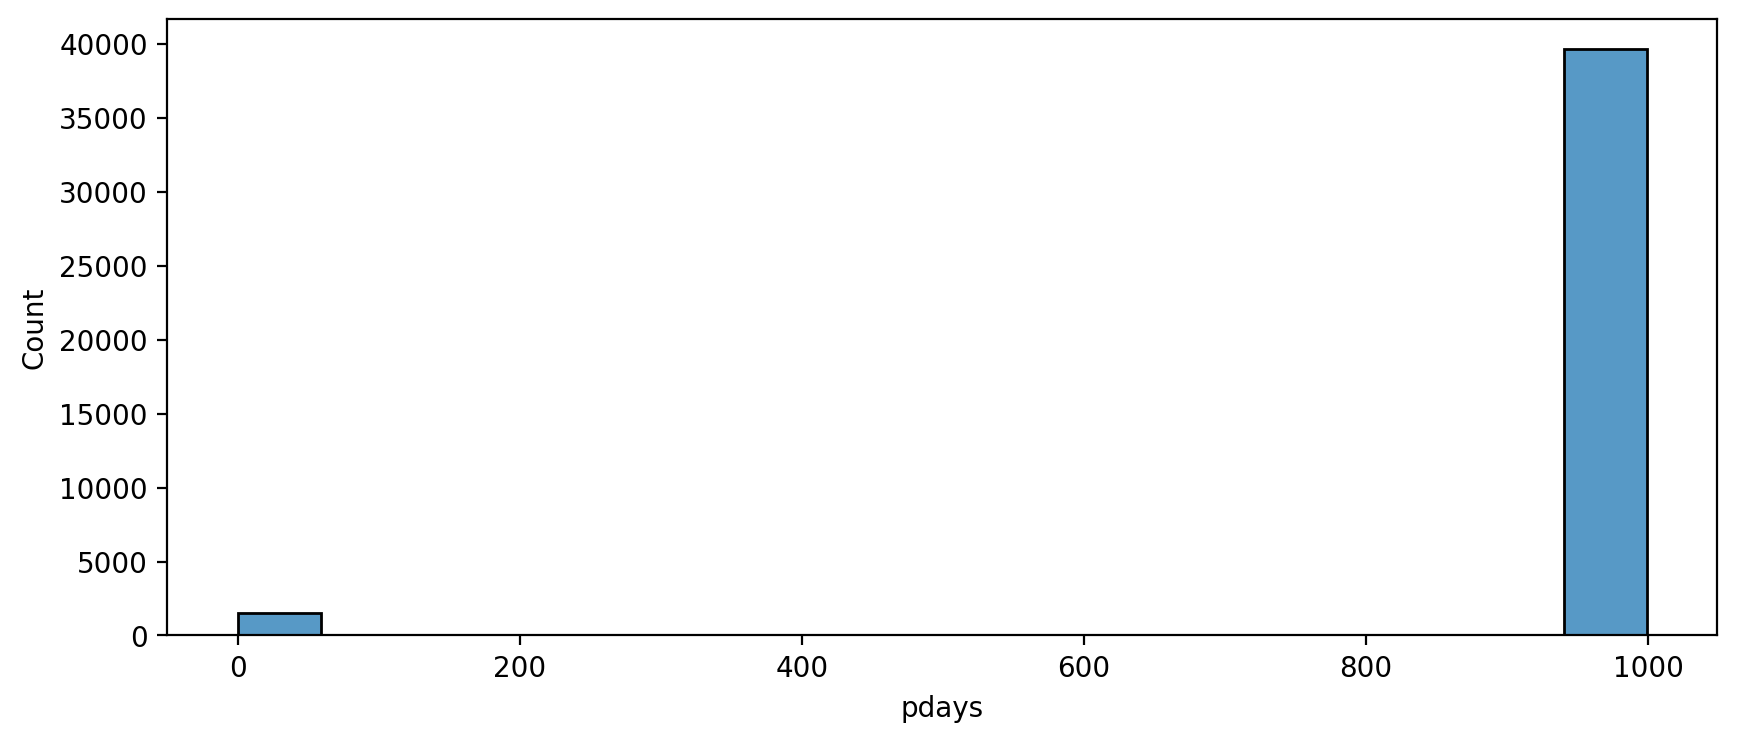

In [ ]:
## grafico pdays per mostrare quanti clienti sono stati contattati recentemente
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=df, x='pdays')

In [ ]:
chiamati = df[df['pdays'] != 999]
#df['pdays'] != 999
chiamati.head(10)
#chiamati.shape

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,6,1,success,-0.1,93.2,-42.0,4.286,5195.8,no
24264,48,management,married,university.degree,no,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.2,-42.0,4.191,5195.8,no
24279,42,technician,married,professional.course,unknown,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.2,-42.0,4.191,5195.8,no
24397,50,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,1,3,1,success,-0.1,93.2,-42.0,4.191,5195.8,no
24482,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,...,2,4,1,success,-0.1,93.2,-42.0,4.191,5195.8,no
24613,32,blue-collar,married,basic.9y,no,no,no,cellular,nov,mon,...,2,5,1,success,-0.1,93.2,-42.0,4.191,5195.8,yes
24799,31,entrepreneur,divorced,basic.4y,no,no,no,cellular,nov,tue,...,1,5,1,success,-0.1,93.2,-42.0,4.153,5195.8,no
24850,51,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,1,1,success,-0.1,93.2,-42.0,4.153,5195.8,no
24910,52,admin.,single,basic.9y,no,yes,no,cellular,nov,tue,...,1,6,1,success,-0.1,93.2,-42.0,4.153,5195.8,no
25053,31,blue-collar,single,basic.9y,no,yes,no,cellular,nov,tue,...,1,4,1,success,-0.1,93.2,-42.0,4.153,5195.8,no


<Axes: xlabel='pdays', ylabel='Count'>

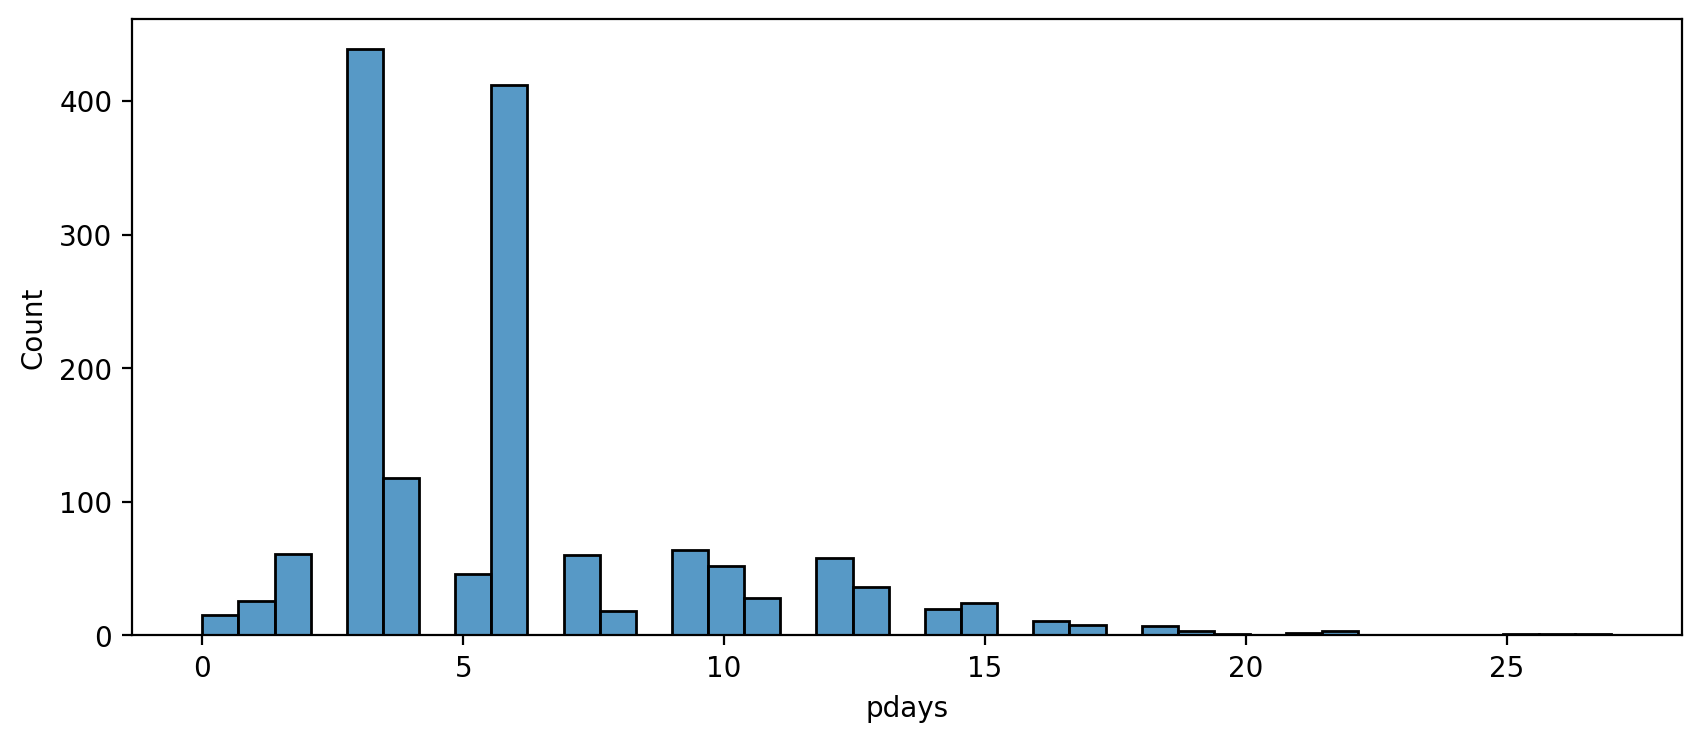

In [ ]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=df[df['pdays'] != 999], x='pdays')

In [ ]:
chiamati['pdays'].value_counts()

3     439
6     412
4     118
9      64
2      61
7      60
12     58
10     52
5      46
13     36
11     28
1      26
15     24
14     20
8      18
0      15
16     11
17      8
18      7
22      3
19      3
21      2
25      1
26      1
27      1
20      1
Name: pdays, dtype: int64

**Contact duration - Quanto è durata la chiamata?**

Utile ad esempio per capire se il cliente è disponibile

(0.0, 1000.0)

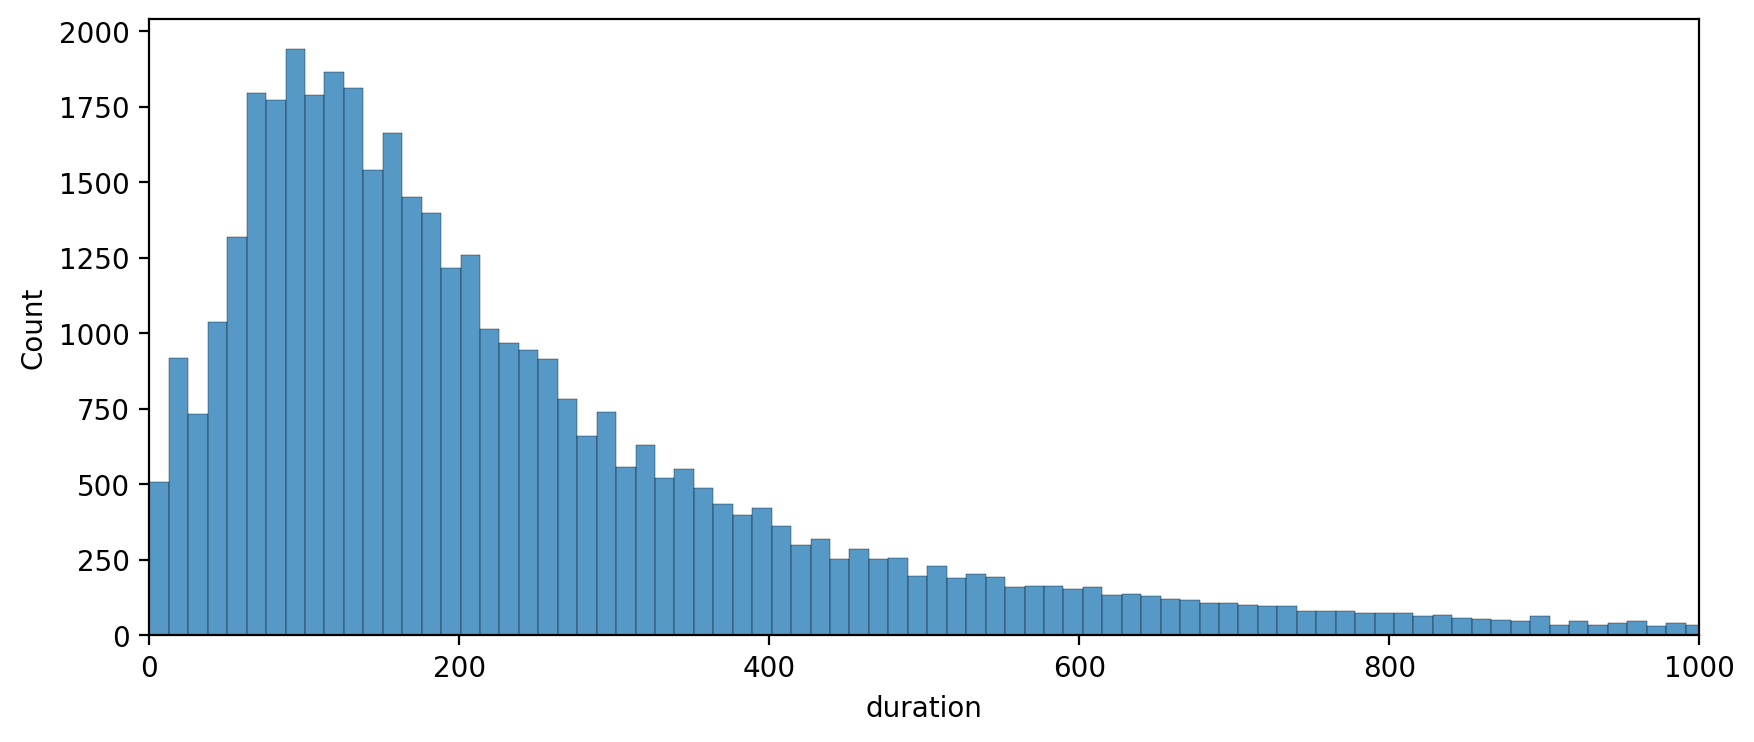

In [ ]:
## grafico durtata chiamate
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=df, x='duration')
plt.xlim(0, 1000)


(0.0, 1000.0)

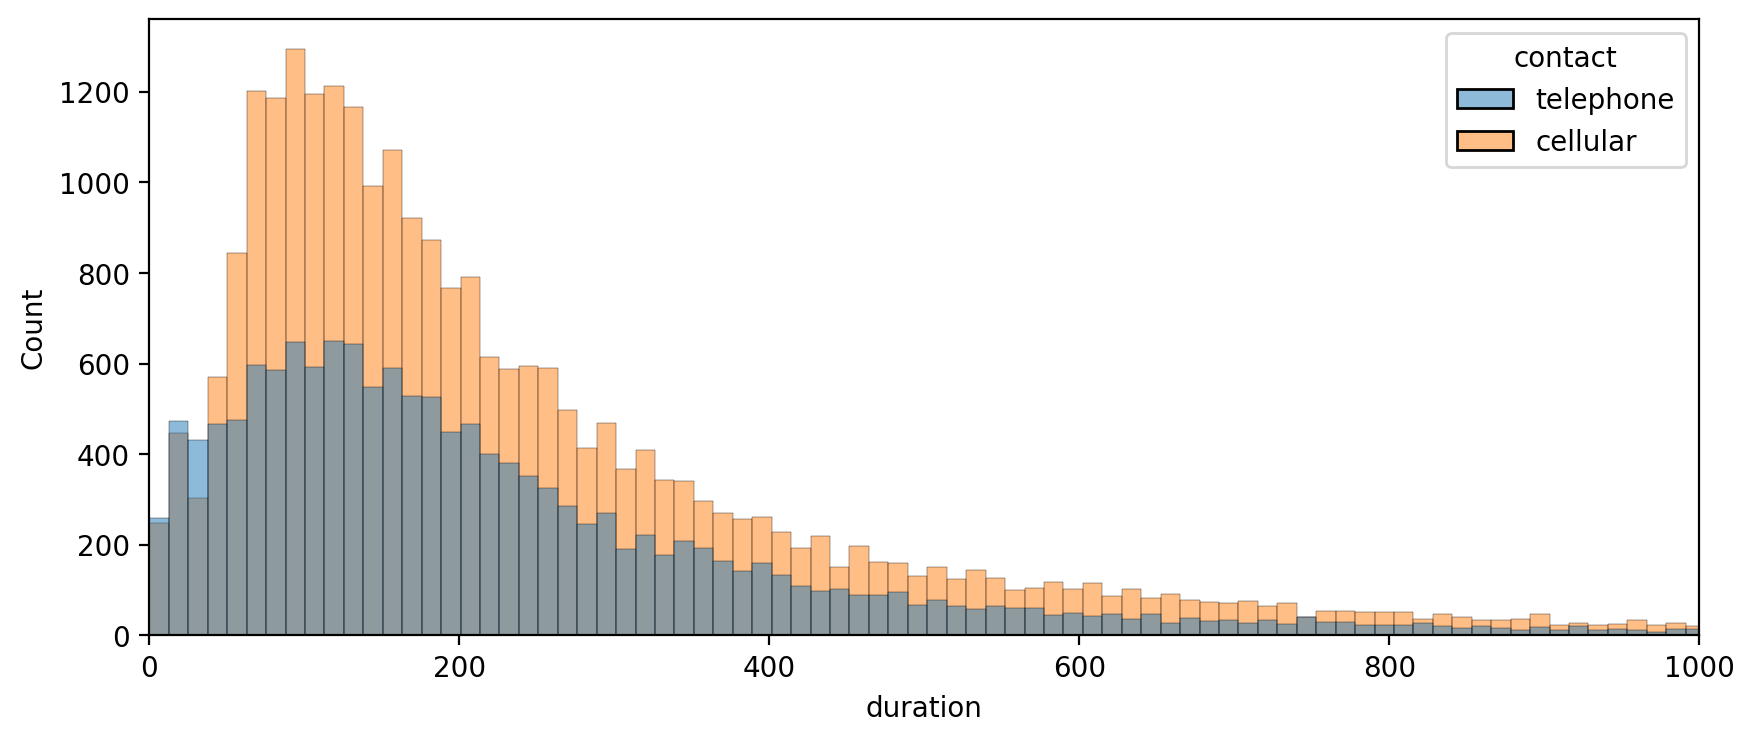

In [ ]:
## differenziamo per telefono o cellulare
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(0, 1000)

In [ ]:
df['contact'].unique()
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

<Axes: xlabel='contact', ylabel='count'>

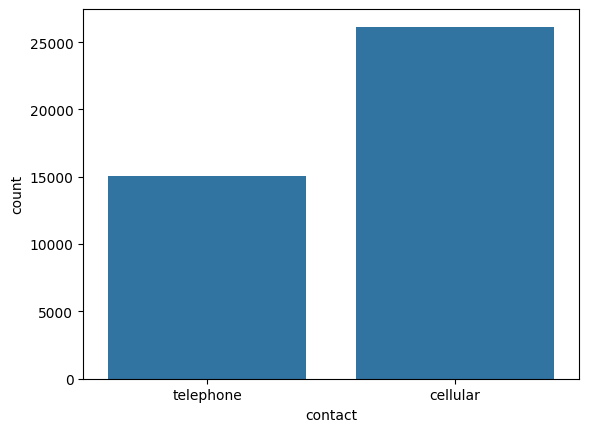

In [ ]:
sns.countplot(data=df, x='contact')

* - previous: Numero di volte in cui il cliente è stato contattato prima della campagna attuale
* - poutcome: Risultato della precedente campagna di marketing

<Axes: xlabel='previous', ylabel='count'>

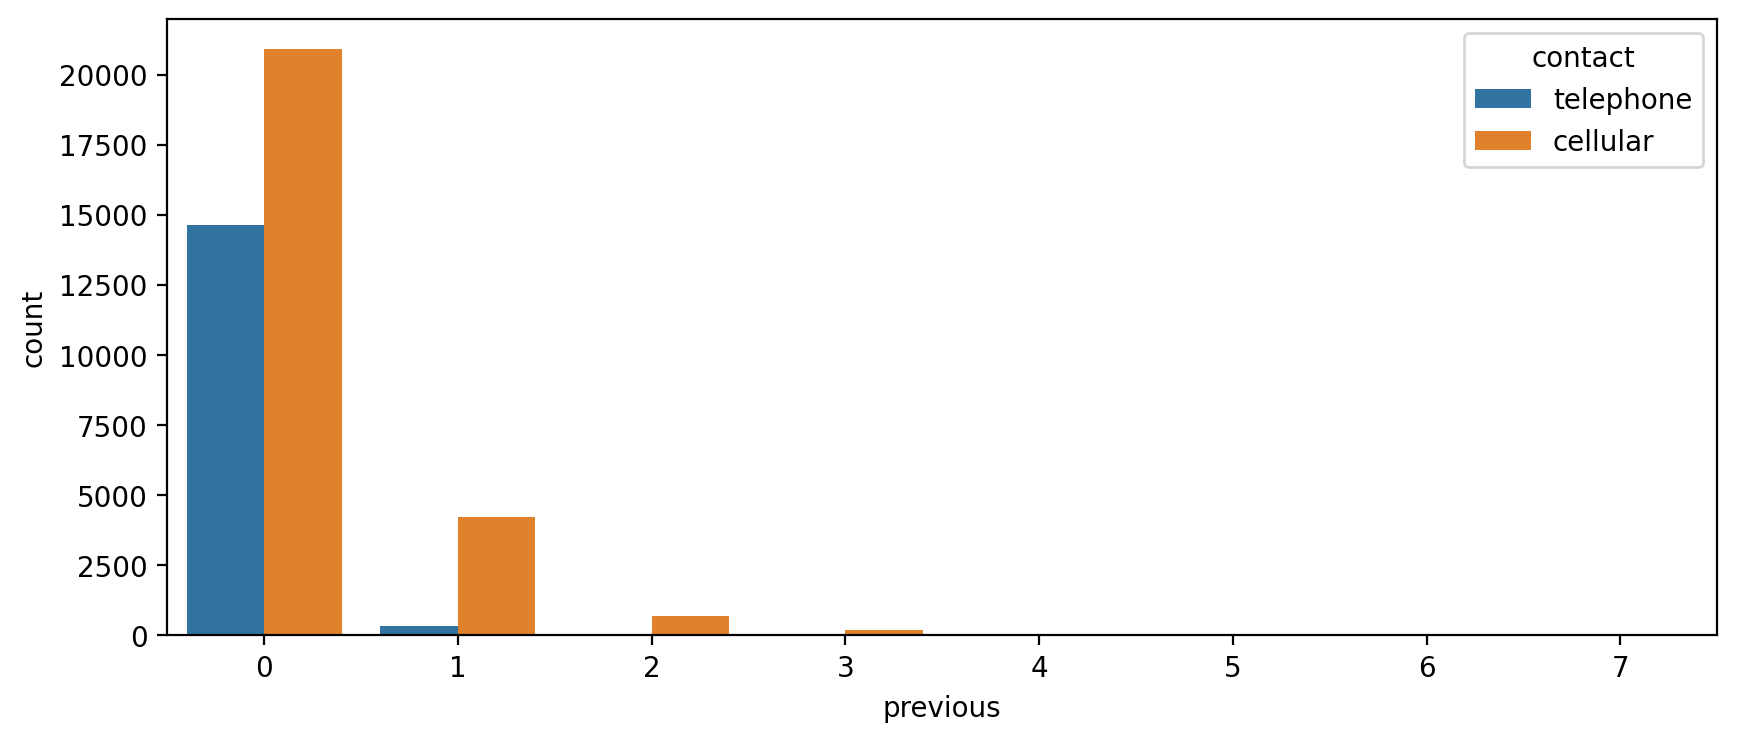

In [ ]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=df, x='previous', hue='contact')

## Categorie
Feature non numeriche ma che riportano un'indicazione


In [ ]:
df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


 #### Tipo di lavoro

 Proviamo a fare un grafico a istogrammi per le frequenze dei diversi tipi di lavori presenti nel dataframe

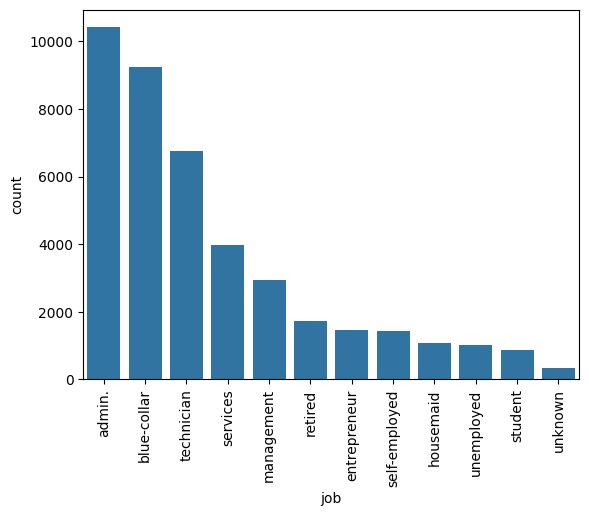

In [ ]:
## tipo di lavoro
sns.countplot(data=df, x='job', order=job_ordinati.index)
plt.xticks(rotation=90);

In [ ]:
## tipi di lavoro ordinati per frequenze
job_ordinati = df['job'].value_counts()
job_ordinati


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

**Stessa cosa per i titoli di studio**

In [ ]:
# titoli di studio


**Vediamo il titolo di studio in rapporto al default**

Il campo default indica se non è stato possibile ripagare il prestito.


In [ ]:
## titoli di studio con default in evidenza

**N.B.**:

Conoscere bene il significato dei dati ci evita errori banali


In [ ]:
## trovare il lavoro e il titolo di studio di chi ha fatto default

In [ ]:
# pair plot - può essere molto impegnativo per la macchina

## Clustering

### Preparazione dati

**Ricordiamoci che stiamo creando un modello non supervisionato, non ci sono Train e Test split perché non avrei nulla da testare**

Abbiamo però bisogno di trasformare in numeri le feature che contengono categorie, e *scalare* i valori numerici.

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Metodo di Pandas `get_dummies()

Genera dei valori numerici sulla base delle categorie. Quindi trova i valori unici di ogni categoria, ad esempio per default abbiamo visto: 'yes', 'no', 'unknown' e genera 3 nuove feature: default_yes, default_no, default_unknown.
Ogni feature avrà valori 0 oppure 1.

Non ci dobbiamo preoccupare di forzati rapporti di linerità perché si tratta di unsupervised.


In [ ]:
X = pd.get_dummies(df)

In [ ]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


### Scalare i dati

Siccome KMeans si basa su distanze dei dati in un sistema di n-dimensioni, è necessario che le quantità numeriche vengano riportate tutte su una scala comune, in caso contrario non sarebbe possibile trovare valori sensati.

Infatti alcune feature hanno valori tra 0 e 1, altre hanno valori con un range molto più esteso, questo porterebbe a misure sballate sul calcolo dei centi dei cluster.

- Per scalare i dati si usa `StandardScaler` di scikit learn -> preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

**Ora possiamo usare l'oggetto StandardScaler**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

#### Fit-Transform

Non avendo test set ne label posso fare direttamente il fitting e il transform, mentre con gli algoritmi supervised dovevo agire separatamente.

### Creazione e Fitting di un KMeans Model

Note of our method choices here:

* fit(X[, y, sample_weight])
    * calcola il modello
  
* fit_predict(X[, y, sample_weight])
    * calcola i centri dei cluster e fa la previsione sul campione, ritorna le label dei cluster

* predict(X[, sample_weight])
    * colloca il campione in un cluster del modello

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several t

**Modello** con 2 cluster

L'idea è che voglio 2 insiemi di clienti, per capire quale insieme è più interessato al marketing.

Vediamo poi se il risultato sarà adeguato

In [ ]:
model = KMeans(n_clusters=2)

In [ ]:
cluster_labels = model.fit_predict(scaled_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Cosa Abbiamo ottenuto?

In [ ]:
# attenzione se non ho impostato il ranadom_state i valori possono cambiare

cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
len(scaled_X)

41188

In [ ]:
len(cluster_labels)

41188

## Riunire con il dataframe

In sostanza abbiamo generato un campo di dati che rappresenta delle label, per capire esattamente come sono composte queste label andiamo a ricongiungere il risultato con i dati originali.

**N.B.:** Prendo il dataframe non scalato!

In [ ]:
# dataframe non scalato con valori dummy
X


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
# aggiungo il campo cluster
X['Cluster'] = cluster_labels

### Risultato:

Abbiamo creato una nuova colonna del dataset che è una label.

*Come posso interpretare quste label?*

Vediamo la correlazione:

In [ ]:
## correlation
X.corr()['Cluster'][:-1]

age                     0.019699
duration               -0.039894
campaign                0.129129
pdays                   0.267700
previous               -0.478467
                          ...   
poutcome_failure       -0.464295
poutcome_nonexistent    0.544377
poutcome_success       -0.254393
subscribed_no           0.294610
subscribed_yes         -0.294610
Name: Cluster, Length: 65, dtype: float64

In [ ]:
# array correlazione

<Axes: >

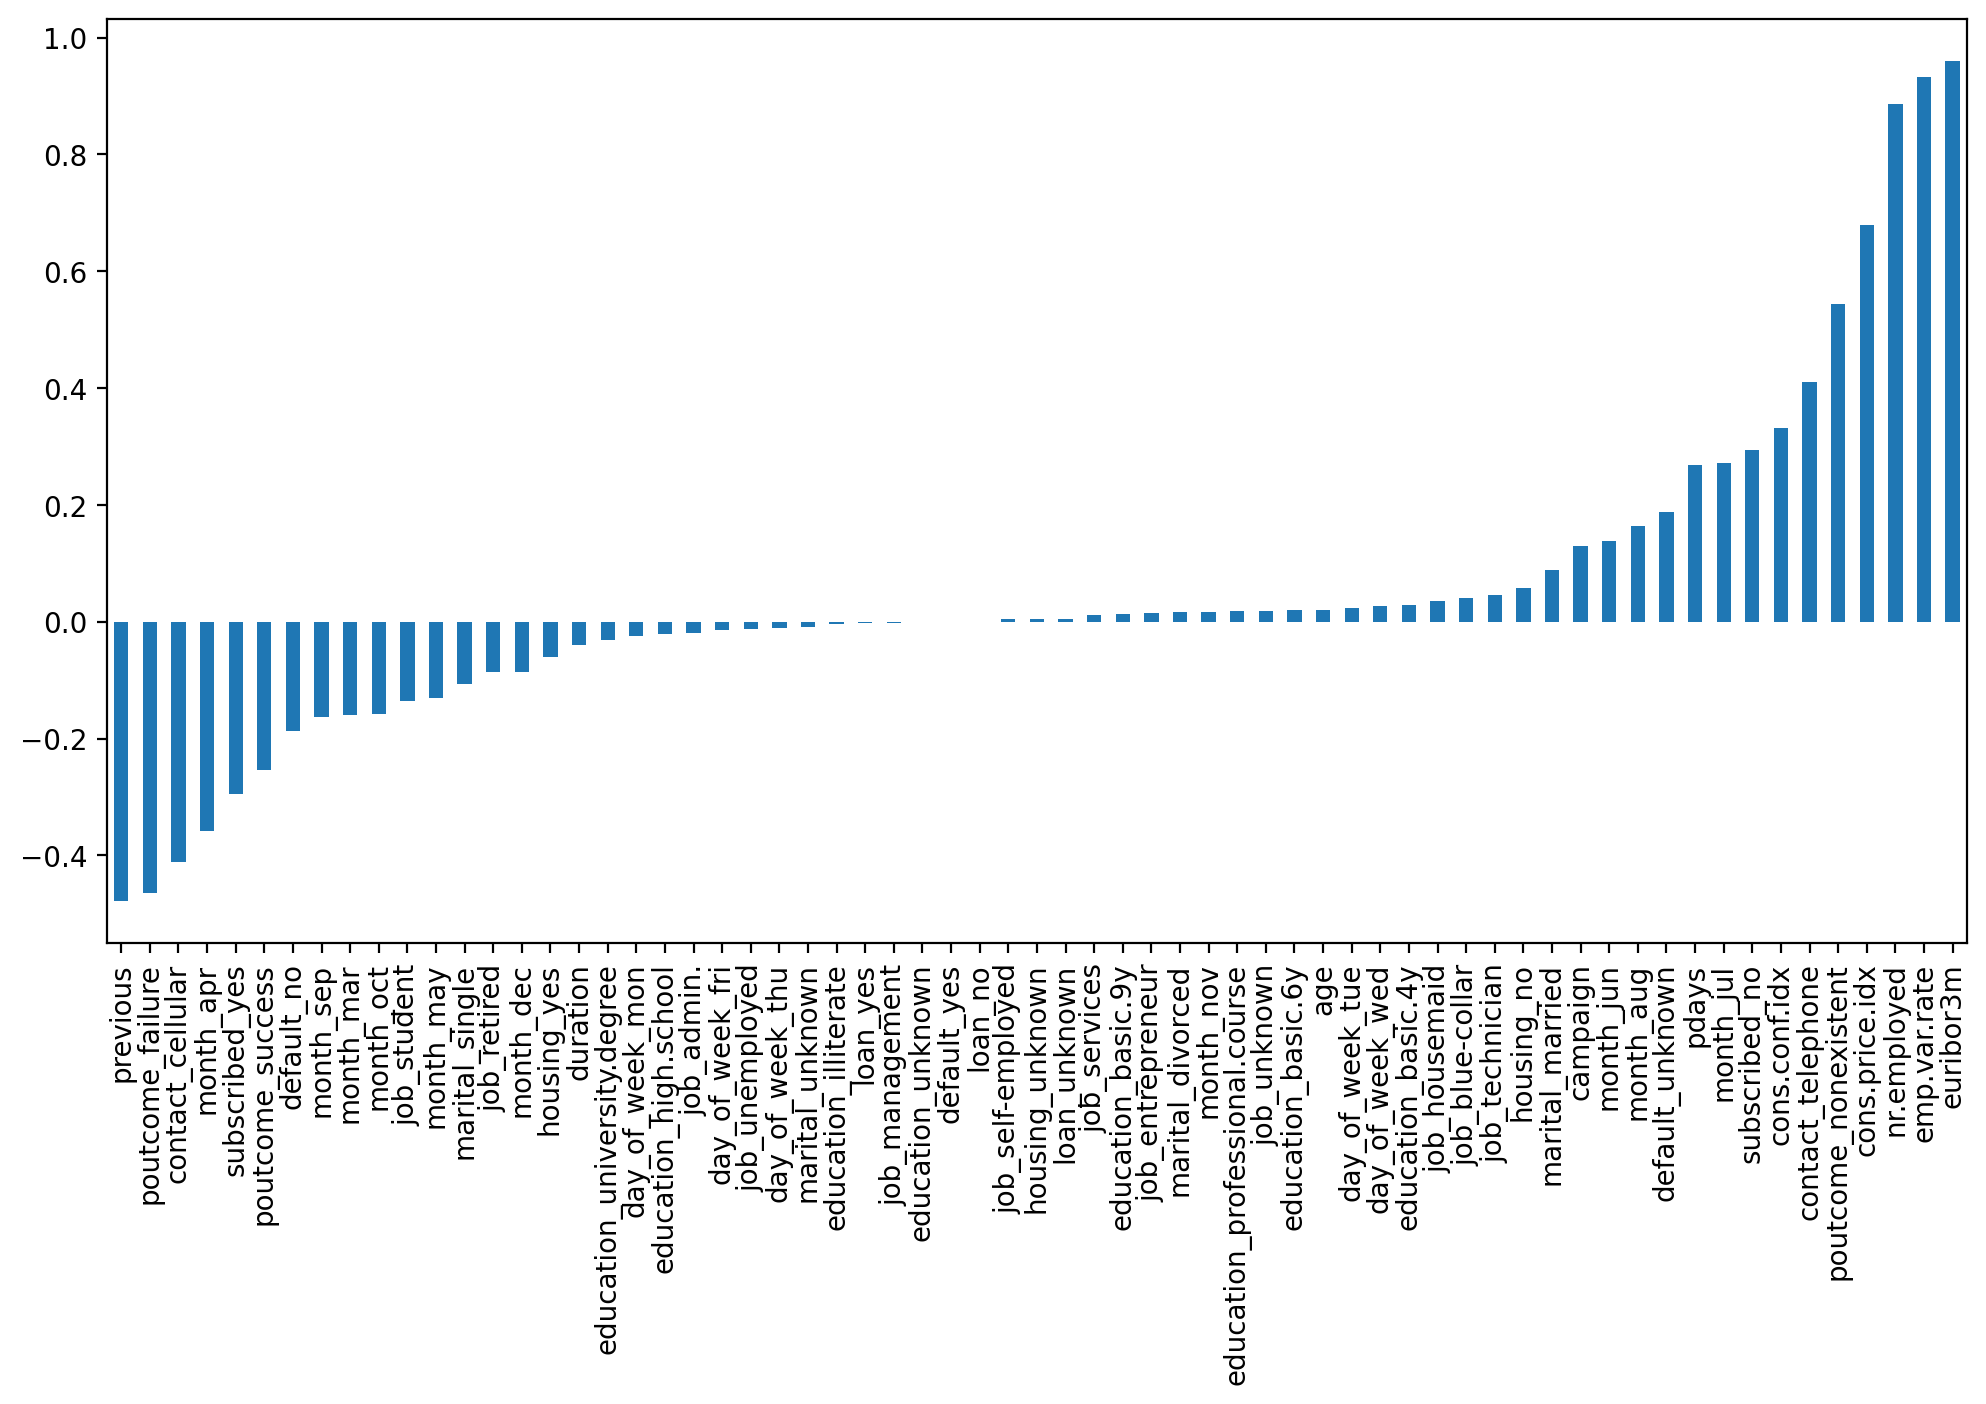

In [ ]:
## plot della correlazione in istogrammi con pandas
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

## Conclusioni
Abbiamo ottenuto 2 label e sappiamo quali sono i valori che influiscono maggiormente per far si che un cliente appartenga a un cluster piuttosto che all'altro.

**Ci rimangono 2 dubbi:**
* Cosa rappresentano queste label?

* Abbiamo fatto bene a dividere in 2 cluster il nostro dataset?

Per capire cosa rappresentano le label trovate dobbiamo guardare con attenzione i dati e il grafico di correlazione, magari parlare con qualcuno che conosce molto bene il problema reale aiuta a farci capire meglio cosa abbiamo trovato.

Per capire se abbiamo fatto bene a scegliere 2 cluster ci sono dei metodi che ci possono dare un'indicazione migliore di quanto abbiamo fatto finora cioè a sentimento.


## Choosing K Value SSD ed Elbow Method

Andiamo a generare n modelli e calcoliamo SSD

In [ ]:
# ciclo for per la creazione dei modelli


**SSD**
si può ricavare direttamente dal modello, infatti è un attributo che si chiama `inertia_` sempre prendendo in prestito un termine dallo studio dei sistemi di vettori.

In [ ]:
## vediamo in un grafico il valore dell'SSD

Analyzing SSE Reduction

In [ ]:
## valori nel vettore
ssd

[2469792.3616627525,
 2370786.5743646966,
 2271503.291848565,
 2219379.8165977024,
 2141338.8100297097,
 2104687.2262974633,
 2047992.063517177,
 2012166.6999391837]

In [ ]:
## calcolare la differenza tra elementi di una Serie pandas metodo diff()

0             NaN
1   -99005.787298
2   -99283.282516
3   -52123.475251
4   -78041.006568
5   -36651.583732
6   -56695.162780
7   -35825.363578
dtype: float64

In [ ]:
## proviamo col grafico a barre


### In generale
questo sistema ci può dare un'indicazione "sull'adattamento" dei dati ai cluster.

Tuttavia nel unsupervised machine learning è molto più importante avere una buona comprensione dei dati per capire cosa si può e non si può fare e cosa aspettarci dal modello.

Sicuramente non possiamo aspettarci una rigorosità assoluta e matematica ma dobbiamo sfruttare gli strumenti che abbiamo comprendendone i limiti.